<a href="https://colab.research.google.com/github/ethanh03/NBA_Project/blob/main/NBA_Project_Ethan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Basketball Memorabilia Investments
In this assignment you will use real data on past basketball players to use ML to inform memorabilia investmentdecisions.

You are provided with data on past players that includes 27 different predictors/attributes on each player. Note that the attribute names are often abbreviated and the complete list is included at the end of this notebook.

You will use the historical data set, Hall-of-fame-train.arff (495 players), to build a classification model predicting whether or not a given player will be inducted (and the probability thereof). You will then apply your model to
select players to invest in. The goal of this assignment is to develop hands-on experience in developing and evaluating machine learning models to inform interventions (investment decisions in this case) and to maximize profitability.

The data set includes a target variable (i.e., the class) which indicates whether or not the player has been inducted to the hall of fame. Note that in this data set, we assume that a player who has not been inducted 45.4 years after retirement, will not be inducted. The target variable is binary and has value 1 if the player has been inducted or 0 otherwise. Note that the data includes the actual target variable value for each player. This information is available for this assignment in order to allow you to evaluate the efficacy of investment decisions and to compare amongst investments selected by different models to identify the best model to use in the future.

## 1. Read in Libraries and NBA data

(run these cells before starting)

In [ ]:
!pip install liac-arff


  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=5cf73c45985d66435675d2d58dfbb37940c51c3a7792d1e11a2c77d2e1df6cce
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import requests
import arff
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, confusion_matrix,accuracy_score, roc_curve, auc # plot evaluations
from sklearn.model_selection import cross_val_score, cross_val_predict


In [ ]:
# get data from online
df_arff = requests.get('https://utexas.box.com/shared/static/u8s1nl2c8b3ijv94z7npg7jl0drml5u0.arff')
df_test_arff = requests.get('https://utexas.box.com/shared/static/u8s1nl2c8b3ijv94z7npg7jl0drml5u0.arff')

# read as arff file
df_arff = arff.load(df_arff.text)
col_val = [attribute[0] for attribute in df_arff['attributes']]

df_test_arff = arff.load(df_test_arff.text)
col_val = [attribute[0] for attribute in df_test_arff['attributes']]

# transform arff file into pandas dataframe
new_df = pd.DataFrame(df_arff['data'], columns = col_val)
meta = df_arff['attributes']

test_df = pd.DataFrame(df_test_arff['data'], columns = col_val)
meta = df_test_arff['attributes']


def clean_df(df):
  cols = list(df.columns)
  for col in cols:
    try:
      # df = df.replace({col: {'YES': True, 'NO': False}})
            df = df.replace({col: {'1': True, '0': False}})
    except:
      pass
    pass
  return df

new_df = clean_df(new_df)
new_df = pd.get_dummies(new_df)

test_df = clean_df(test_df)
test_df = pd.get_dummies(test_df)

In [ ]:
# read in csv data
df_csv = pd.read_csv('https://utexas.box.com/shared/static/24dmtadnoxzjqwm04tpdjseqz1msclyk.csv')
df_csv

df_csv = clean_df(df_csv)
df_csv = pd.get_dummies(df_csv)

In [ ]:
new_df

,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,turnover,...,firstSeason,lastSeason,careerEnded,yrsRetired2004,class,league_A,league_N,Position_C,Position_F,Position_G
0,408.0,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.0,175.0,700.0,...,1982.0,1990.0,1.0,14.0,False,0,1,0,0,1
1,51.0,0.0,587.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,...,1949.0,1949.0,1.0,55.0,False,0,1,0,0,1
2,265.0,0.0,1712.0,0.0,0.0,72.0,311.0,0.0,0.0,0.0,...,1946.0,1950.0,1.0,54.0,False,0,1,0,0,1
3,133.0,2587.0,992.0,55.0,198.0,253.0,291.0,123.0,14.0,207.0,...,2003.0,2004.0,0.0,0.0,False,0,1,0,0,1
4,8.0,28.0,7.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,...,2004.0,2004.0,0.0,0.0,False,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,262.0,5229.0,2508.0,214.0,468.0,682.0,507.0,319.0,101.0,289.0,...,1976.0,1979.0,1.0,25.0,False,0,1,0,0,1
491,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1946.0,1946.0,1.0,58.0,False,0,1,0,1,0
492,814.0,19241.0,9948.0,140.0,282.0,4555.0,1112.0,89.0,16.0,0.0,...,1963.0,1974.0,1.0,30.0,False,0,1,0,1,0
493,98.0,1220.0,345.0,71.0,248.0,319.0,48.0,27.0,42.0,85.0,...,2000.0,2002.0,1.0,2.0,False,0,1,0,1,0


## 2. Exploring the Data

### 2.1 Building, Evaluating, and Comparing Different Machine Learning Models (5 points)

**IMPORTANT: When training these models you MUST use `random_state=3` on each of the classifiers and Naive Bayes. Failure to do so will be (-5 points)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

X = new_df.drop(columns='class')
y = new_df['class']

model_dict = {}

# 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2
# 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3

# Optimal Decision Tree for Classification Accuracy
decision_tree_model_acc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 7, min_samples_split= 2, random_state=3).fit(X, y)
model_dict[decision_tree_model_acc] = ['Decision Tree Model acc']

# Optimal Decision Tree for AUC ROC
decision_tree_model_roc = DecisionTreeClassifier(criterion = 'entropy', max_depth=6, random_state=3, min_samples_leaf=1, min_samples_split=3).fit(X, y)
model_dict[decision_tree_model_roc] = ['Decision Tree Model roc']

# {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
# {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}

# Optimal K Nearest Neighbors Model for Classification Accuracy
kneighbors_model_acc = KNeighborsClassifier(weights = 'distance', algorithm = 'auto', n_neighbors=5).fit(X, y)
model_dict[kneighbors_model_acc] = ['K Nearest Neighbors Model acc']

# Optimal K Nearest Neighbors Model for AUC ROC
kneighbors_model_roc = KNeighborsClassifier(weights = 'uniform', algorithm = 'auto', n_neighbors=8).fit(X, y)
model_dict[kneighbors_model_roc] = ['K Nearest Neighbors Model roc']

# acc {'base_estimator__algorithm': 'auto', 'base_estimator__n_neighbors': 5, 'base_estimator__weights': 'distance', 'n_estimators': 15}
# roc {'base_estimator__algorithm': 'auto', 'base_estimator__n_neighbors': 7, 'base_estimator__weights': 'distance', 'n_estimators': 15}

# Optimal K Nearest Neighbors Bagging Model for Classification Accuracy
clf_kneighbors_bagging_model_acc = KNeighborsClassifier(weights = 'uniform', algorithm = 'auto', n_neighbors=5)
kneighbors_bagging_model_acc = BaggingClassifier(base_estimator=clf_kneighbors_bagging_model_acc, n_estimators=15, random_state=3).fit(X, y)
model_dict[kneighbors_bagging_model_acc] = ['K Nearest Neighbors Bagging Model acc']

# Optimal K Nearest Neighbors Bagging Model for AUC ROC
clf_kneighbors_bagging_model_roc = KNeighborsClassifier(weights = 'uniform', algorithm = 'auto', n_neighbors=7)
kneighbors_bagging_model_roc = BaggingClassifier(base_estimator=clf_kneighbors_bagging_model_roc, n_estimators=15, random_state=3).fit(X, y)
model_dict[kneighbors_bagging_model_roc] = ['K Nearest Neighbors Bagging Model roc']

# acc 'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 4, 'n_estimators': 5}
# roc {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 6, 'n_estimators': 15}

# Optimal Decision Tree Bagging Model for Clasification Accuacy
clf_decision_tree_bagging_model_acc = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=1, min_samples_split=4, max_depth=4)
decision_tree_bagging_model_acc = BaggingClassifier(base_estimator=clf_decision_tree_bagging_model_acc, n_estimators=5, random_state=3).fit(X, y)
model_dict[decision_tree_bagging_model_acc] = ['Decision Tree Bagging Model acc']

# Optimal Decision Tree Bagging Model for AUC ROC
clf_decision_tree_bagging_model_roc = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=1, min_samples_split=6, max_depth=5)
decision_tree_bagging_model_roc = BaggingClassifier(base_estimator=clf_decision_tree_bagging_model_roc, n_estimators=15, random_state=3).fit(X, y)
model_dict[decision_tree_bagging_model_roc] = ['Decision Tree Bagging Model roc']

# acc 9
# roc 10

# Optimal Logistic Regression Bagging Model for Classification Accuracy
clf_logistic_bagging_model_acc = LogisticRegression()
logistic_bagging_model_acc = BaggingClassifier(base_estimator=clf_logistic_bagging_model_acc, n_estimators=9, random_state=3).fit(X, y)
model_dict[logistic_bagging_model_acc] = ['Logistic Regression Bagging Model acc']

# Optimal Logistic Regression Bagging Model for AUC ROC
clf_logistic_bagging_model_roc = LogisticRegression()
logistic_bagging_model_roc = BaggingClassifier(base_estimator=clf_logistic_bagging_model_roc, n_estimators=10, random_state=3).fit(X, y)
model_dict[logistic_bagging_model_roc] = ['Logistic Regression Bagging Model roc']

# acc {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 15}
# roc 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 20}

# Opitmal Random Forest Classifier for Classification Accuracy
random_forest_model_acc = RandomForestClassifier(criterion = 'entropy', n_estimators=15, min_samples_leaf=1, min_samples_split=8, max_depth=5, random_state=3).fit(X,y)
model_dict[random_forest_model_acc] = ['Random Forest Classifier acc']

# Optimal Random Forest Classifier for AUC ROC
random_forest_model_roc = RandomForestClassifier(criterion = 'entropy', n_estimators=20, min_samples_leaf=3, min_samples_split=2, max_depth=5, random_state=3).fit(X,y)
model_dict[random_forest_model_roc] = ['Random Forest Classifier roc']

# acc alpha=0.1, fit_prior=True
# roc alpha=0.1, fit_prior=True

# Optimal Multinomial NB Model for Classification Accuracy
np.random.seed(3)
multinomial_nb_model_acc = MultinomialNB(alpha=0.1, fit_prior=True).fit(X, y)
model_dict[multinomial_nb_model_acc] = ['Multinomial NB Model acc']

# Optimal Multinomial NB Model for AUC ROC
np.random.seed(3)
multinomial_nb_model_roc = MultinomialNB(alpha=0.1, fit_prior=True).fit(X, y)
model_dict[multinomial_nb_model_roc] = ['Multinomial NB Model roc']

# acc {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 10}
# roc {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 6, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 20}

# Ada Boost Model
clf_ada_boost_model_acc = DecisionTreeClassifier(criterion = 'entropy', max_depth=6, random_state=3, min_samples_leaf=2, min_samples_split=2).fit(X, y)
ada_boost_model_acc = AdaBoostClassifier(base_estimator = clf_ada_boost_model_acc, algorithm="SAMME.R", n_estimators=10, learning_rate = 0.1, random_state=3).fit(X, y)
model_dict[ada_boost_model_acc] = ['Ada Boost Model acc']

# Ada Boost Model
clf_ada_boost_model_roc = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, random_state=3, min_samples_leaf=6, min_samples_split=2).fit(X, y)
ada_boost_model_roc = AdaBoostClassifier(base_estimator = clf_ada_boost_model_roc, algorithm="SAMME.R", n_estimators=20, learning_rate = 0.1, random_state=3).fit(X, y)
model_dict[ada_boost_model_roc] = ['Ada Boost Model roc']

# acc {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
# roc 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60

# Gradient Boost Model
gradient_boost_model_acc = GradientBoostingClassifier(n_estimators=60, loss = 'deviance', learning_rate=0.1, max_depth=4, min_samples_leaf = 1, min_samples_split=2, random_state=3).fit(X, y)
model_dict[gradient_boost_model_acc] = ['Gradient Boost Model acc']

# Gradient Boost Model
gradient_boost_model_roc = GradientBoostingClassifier(n_estimators=60, loss = 'deviance', learning_rate=0.1, max_depth=4, min_samples_leaf = 1, min_samples_split=2, random_state=3).fit(X, y)
model_dict[gradient_boost_model_roc] = ['Gradient Boost Model roc']

# build and compare the results of your models using 10-fold cross validation here (display results for each)
def report_score(model):

  bagging_scores = cross_val_score(model, X, y, cv=10)
  predicted_labels = cross_val_predict(model, X, y, cv=10)

  accuracy = accuracy_score(y, predicted_labels)
  roc_auc = roc_auc_score(y, predicted_labels, average='weighted')

  model_dict[model] += [round(roc_auc, 3), round(accuracy, 3)]

  print("roc_auc:", round(roc_auc, 3))
  print("accuracy:", round(accuracy, 3))
  print()

def find_max(model_dict):
  max_roc = ['', -1]
  for model in model_dict:
    if model_dict[model][1] > max_roc[1]:
      max_roc = [model_dict[model][0], model_dict[model][1]]

  max_accuracy = ['', -1]
  for model in model_dict:
    if model_dict[model][2] > max_accuracy[1]:
      max_accuracy = [model_dict[model][0], model_dict[model][2]]

  return max_roc, max_accuracy

for model in model_dict:
  print(model_dict[model][0] + ':')
  report_score(model)

max_roc, max_accuracy = find_max(model_dict)

print('Highest ROC AUC:', max_roc)
print('Highest Accuracy:', max_accuracy)

# play with the parameters of each model to try and generate the best result

Decision Tree Model acc:
roc_auc: 0.828
accuracy: 0.96

Decision Tree Model roc:
roc_auc: 0.918
accuracy: 0.978

K Nearest Neighbors Model acc:
roc_auc: 0.864
accuracy: 0.972

K Nearest Neighbors Model roc:
roc_auc: 0.808
accuracy: 0.96

K Nearest Neighbors Bagging Model acc:
roc_auc: 0.843
accuracy: 0.97

K Nearest Neighbors Bagging Model roc:
roc_auc: 0.84
accuracy: 0.964

Decision Tree Bagging Model acc:
roc_auc: 0.927
accuracy: 0.976

Decision Tree Bagging Model roc:
roc_auc: 0.904
accuracy: 0.972

Logistic Regression Bagging Model acc:
roc_auc: 0.883
accuracy: 0.97

Logistic Regression Bagging Model roc:
roc_auc: 0.872
accuracy: 0.968

Random Forest Classifier acc:
roc_auc: 0.907
accuracy: 0.976

Random Forest Classifier roc:
roc_auc: 0.872
accuracy: 0.968

Multinomial NB Model acc:
roc_auc: 0.898
accuracy: 0.887

Multinomial NB Model roc:
roc_auc: 0.898
accuracy: 0.887

Ada Boost Model acc:
roc_auc: 0.897
accuracy: 0.976

Ada Boost Model roc:
roc_auc: 0.873
accuracy: 0.97

Gradie

In [ ]:
#This code will find the best parameters for the different types of models
from sklearn.model_selection import GridSearchCV

"""# find best parameters for decision tree model

parameters = {
    'criterion': ['entropy'],
    'max_depth': range(1, 7),
    'min_samples_leaf': range(1, 11),
    'min_samples_split': range(1, 11)
}

roc_search = GridSearchCV(
    decision_tree_model,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv = 10

)

acc_search = GridSearchCV(
    decision_tree_model,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10

)

roc_search.fit(X, y)
acc_search.fit(X, y)

print('Decision Tree Model:')
print()
print('Optimal ROC AUC parameters:', roc_search.best_params_)
print('Best ROC AUC Score:', roc_search.best_score_)
print()
print('Optimal accuracy parameters:', acc_search.best_params_)
print('Best accuracy Score:', acc_search.best_score_)
print()

# find best parameters for k nearest neighbors model

parameters = {
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors': range(1, 16),

}

roc_search = GridSearchCV(
    kneighbors_model,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv = 10

)

acc_search = GridSearchCV(
    kneighbors_model,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10

)

roc_search.fit(X, y)
acc_search.fit(X, y)

print('K Nearest Neighbors Model:')
print()
print('Optimal ROC AUC parameters:', roc_search.best_params_)
print('Best ROC AUC Score:', roc_search.best_score_)
print()
print('Optimal accuracy parameters:', acc_search.best_params_)
print('Best accuracy Score:', acc_search.best_score_)
print()

# find best parameters for k nearest neighbor bagging model

parameters = {
    'base_estimator__weights': ['uniform', 'distance'],
    'base_estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'base_estimator__n_neighbors': range(1, 16),
    'n_estimators': [5, 10, 15, 20]
}

roc_search = GridSearchCV(
    kneighbors_bagging_model,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv = 10

)

acc_search = GridSearchCV(
    kneighbors_bagging_model,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10

)

roc_search.fit(X, y)
acc_search.fit(X, y)

print('K Nearest Neighbors Bagging Model:')
print()
print('Optimal ROC AUC parameters:', roc_search.best_params_)
print('Best ROC AUC Score:', roc_search.best_score_)
print()
print('Optimal accuracy parameters:', acc_search.best_params_)
print('Best accuracy Score:', acc_search.best_score_)
print()

# find best parameters for decision tree bagging model

parameters = {
    'base_estimator__criterion': ['entropy'],
    'base_estimator__max_depth': range(1, 7),
    'base_estimator__min_samples_leaf': range(1, 11),
    'base_estimator__min_samples_split': range(1, 11),
    'n_estimators': [5, 10, 15, 20]

}

roc_search = GridSearchCV(
    decision_tree_bagging_model,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv = 10

)

acc_search = GridSearchCV(
    decision_tree_bagging_model,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10

)

roc_search.fit(X, y)
acc_search.fit(X, y)

print('Decision Tree Bagging Model:')
print()
print('Optimal ROC AUC parameters:', roc_search.best_params_)
print('Best ROC AUC Score:', roc_search.best_score_)
print()
print('Optimal accuracy parameters:', acc_search.best_params_)
print('Best accuracy Score:', acc_search.best_score_)
print()

# find best parameters for logistic regression bagging model

parameters = {
    'n_estimators': range(1, 20)
}

roc_search = GridSearchCV(
    logistic_bagging_model,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv = 10

)

acc_search = GridSearchCV(
    logistic_bagging_model,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10

)

roc_search.fit(X, y)
acc_search.fit(X, y)

print('Logistic Regression Bagging Model:')
print()
print('Optimal ROC AUC parameters:', roc_search.best_params_)
print('Best ROC AUC Score:', roc_search.best_score_)
print()
print('Optimal accuracy parameters:', acc_search.best_params_)
print('Best accuracy Score:', acc_search.best_score_)
print()

# find best parameters for random forest classifier

parameters = {
    'criterion': ['entropy'],
    'max_depth': range(1, 7),
    'min_samples_leaf': range(1, 11),
    'min_samples_split': range(1, 11),
    'n_estimators': [5, 10, 15, 20]
}

roc_search = GridSearchCV(
    random_forest_model,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv = 10

)

acc_search = GridSearchCV(
    random_forest_model,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10

)

roc_search.fit(X, y)
acc_search.fit(X, y)

print('Random Forest Classifier:')
print()
print('Optimal ROC AUC parameters:', roc_search.best_params_)
print('Best ROC AUC Score:', roc_search.best_score_)
print()
print('Optimal accuracy parameters:', acc_search.best_params_)
print('Best accuracy Score:', acc_search.best_score_)
print()

# find best parameters for multinomial nb model

parameters = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'fit_prior':  [True, False]
}

roc_search = GridSearchCV(
    multinomial_nb_model,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv = 10

)

acc_search = GridSearchCV(
    multinomial_nb_model,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10

)

roc_search.fit(X, y)
acc_search.fit(X, y)

print('Multinomial NB Model:')
print()
print('Optimal ROC AUC parameters:', roc_search.best_params_)
print('Best ROC AUC Score:', roc_search.best_score_)
print()
print('Optimal accuracy parameters:', acc_search.best_params_)
print('Best accuracy Score:', acc_search.best_score_)
print()
"""
# find best parameters for ada boost model

parameters = {
    'algorithm': ['SAMME.R', 'SAMME'],
    'n_estimators': [10, 20, 30],
    'base_estimator__criterion': ['entropy'],
    'base_estimator__max_depth': range(4, 7),
    'base_estimator__min_samples_leaf': range(1, 8),
    'base_estimator__min_samples_split': range(2, 4),
    'learning_rate': [0.1]
}

roc_search = GridSearchCV(
    ada_boost_model,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv = 10

)

acc_search = GridSearchCV(
    ada_boost_model,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10

)

roc_search.fit(X, y)
acc_search.fit(X, y)

print('ADA Boost Model:')
print()
print('Optimal ROC AUC parameters:', roc_search.best_params_)
print('Best ROC AUC Score:', roc_search.best_score_)
print()
print('Optimal accuracy parameters:', acc_search.best_params_)
print('Best accuracy Score:', acc_search.best_score_)
print()

# find best parameters for gradient boost model

parameters = {
    'loss': ['deviance', 'exponential'],
    'n_estimators': [20, 40, 60, 80, 100],
    'learning_rate': [0.1],
    'max_depth': range(4, 7),
    'min_samples_leaf': range(1, 8),
    'min_samples_split': range(2, 4)
}

roc_search = GridSearchCV(
    gradient_boost_model,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv = 10

)

acc_search = GridSearchCV(
    gradient_boost_model,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10

)

roc_search.fit(X, y)
acc_search.fit(X, y)

print('Gradient Boost Model:')
print()
print('Optimal ROC AUC parameters:', roc_search.best_params_)
print('Best ROC AUC Score:', roc_search.best_score_)
print()
print('Optimal accuracy parameters:', acc_search.best_params_)
print('Best accuracy Score:', acc_search.best_score_)
print()

Decision Tree Model:

Optimal ROC AUC parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}
Best ROC AUC Score: 0.9328888888888889

Optimal accuracy parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best accuracy Score: 0.9777551020408163

K Nearest Neighbors Model:

Optimal ROC AUC parameters: {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}
Best ROC AUC Score: 0.9518333333333333

Optimal accuracy parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Best accuracy Score: 0.9717142857142858

K Nearest Neighbors Bagging Model:

Optimal ROC AUC parameters: {'base_estimator__algorithm': 'auto', 'base_estimator__n_neighbors': 7, 'base_estimator__weights': 'distance', 'n_estimators': 15}
Best ROC AUC Score: 0.9494444444444445

Optimal accuracy parameters: {'base_estimator__algorithm': 'auto', 'base_estimator__n_neighbors': 5, 'base_estimator__weights': 'distance', 'n_estimators': 15}
Best accuracy Score: 0.9736734693877549

Decision Tree Bagging Model:

Optimal ROC AUC parameters: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 6, 'n_estimators': 15}
Best ROC AUC Score: 0.9547222222222222

Optimal accuracy parameters: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 4, 'n_estimators': 5}
Best accuracy Score: 0.9756734693877551

Logistic Regression Bagging Model:

Optimal ROC AUC parameters: {'n_estimators': 10}
Best ROC AUC Score: 0.9570000000000001

Optimal accuracy parameters: {'n_estimators': 9}
Best accuracy Score: 0.9697142857142855

Random Forest Classifier:

Optimal ROC AUC parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 20}
Best ROC AUC Score: 0.9725555555555555

Optimal accuracy parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 15}
Best accuracy Score: 0.9757142857142856

Multinomial NB Model:

Optimal ROC AUC parameters: {'alpha': 0.1, 'fit_prior': True}
Best ROC AUC Score: 0.8939444444444444

Optimal accuracy parameters: {'alpha': 0.1, 'fit_prior': True}
Best accuracy Score: 0.8866938775510202

ADA Boost Model:

Optimal ROC AUC parameters: {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 6, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 20}
Best ROC AUC Score: 0.9735555555555555

Optimal accuracy parameters: {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 10}
Best accuracy Score: 0.9757551020408162

Gradient Boost Model:

Optimal ROC AUC parameters: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best ROC AUC Score: 0.9795555555555555

Optimal accuracy parameters: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Best accuracy Score: 0.9757551020408164

**2.2 Using classification accuracy rate as the evaluation measure, which model best predicts whether or not a player will be inducted? (5 points)**

The Decision Tree Model

**2.3 Using the area under the ROC curve, which model yields the largest area under the ROC curve? (10 points)**

The Decision Tree Bagging Model

**2.4 Given your goal is to identify and invest in a set of players likely to be inducted to the Hall of Fame, which
of the two measures above (classification accuracy rate or ROC area) is more appropriate for selecting the
model to inform your investments? Explain your answer. (Note that while classification accurate rate and
ROC area may often agree, in some cases the classification accuracy of two models may be comparable,
while the ROC area of one may be larger than the other.) (5 points)**


I think that ROC is a more appropriate measure for selecting the model to inform my investments, as it allows for us to measure the ratio of accepted true positives to false positives. Because a false positive could result in a loss of profit, using a metric that allows me to reduce the predicted amount of false positives and maximize true positives is optimal. Additionally, the classification accuracy rate may capture misleading accuracy based on an imbalanced dataset (which is likely with investments since only a few may actually be positive outcomes) and with higher sensitivity to an imprecise threshold (which could be the case as these predictions are based on estimated models). The ROC will be able to account for this prioritization of false negatives and false positives which would be detrimental to determining a wise investment.

## 3. Analysis and Model Improvement

In [ ]:
#This code outputs the top 3 features from the model using 2 different methods: information gain and chi2

print(new_df.corr()['class'].sort_values(ascending=False).head(4))



from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

X = new_df.drop(columns='class')
y = new_df['class']


# apply SelectKBest to select the top 3 features based on Information gain
selector = SelectKBest(score_func=mutual_info_classif, k=3)
X_new = selector.fit_transform(X, y)
# get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# get the names of the selected features
print("Info gain top 3 features: ",X.columns[selected_indices])


# apply SelectKBest to select the top 3 features based on chi2
selector = SelectKBest(score_func=chi2, k=3)
#Fill the missing code...
X_new = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)

print("The top 3 features based on chi2 are: ",X.columns[selected_indices])


class    1.000000
ftm      0.712440
fta      0.711321
fga      0.688851
Name: class, dtype: float64
Info gain top 3 features:  Index(['fga', 'fta', 'ftm'], dtype='object')
The top 3 features based on chi2 are:  Index(['minutes', 'pts', 'fga'], dtype='object')


In [ ]:
#This code displays the dataframe with the features from the chi2 top 3 feature output
df_2 = new_df[[
    'minutes',
    'pts',
    'fga',

    ]]

df_2

,minutes,pts,fga
0,9825.0,5232.0,4074.0
1,0.0,587.0,620.0
2,0.0,1712.0,2190.0
3,2587.0,992.0,824.0
4,28.0,7.0,6.0
...,...,...,...
490,5229.0,2508.0,2415.0
491,0.0,0.0,7.0
492,19241.0,9948.0,8853.0
493,1220.0,345.0,323.0


**3.1 Using a correlation matrix on the dataframe, list the three best predictors of a player’s future induction to the hall of fame (in other words, the three best predictors of the column 'class'). Here, do not use visualization, as above, but correlation to quantify and rank/sort the
attributes by their predictive value. Explain why correlation is a valid ranking measure in this scenario.
Please explore further measures for evaluating the significance of features using the SelectKBest function, as taught in class and illustrated in the cell above, specifically focusing on "information gain" and "Chi-square." Is there a consensus among the three methods regarding the top three features?
 (10 points)**

Hint: use Google if you don't know how to use a pandas correlation matrix

In [ ]:
#This code outputs the top 3 features from the model using a correlation matrix
corr = df_csv.corr()
top_3_corr = corr['class'].sort_values(ascending=True)[24:27]
print("Top 3 features by correlation: ", top_3_corr.index)


Top 3 features by correlation:  Index(['fga', 'fta', 'ftm'], dtype='object')


**3.1 Explanation:**
Correlation measures the strength and direction of a linear relationship between two variables. In the context of predicting Hall of Fame induction, a strong positive or negative correlation indicates that there is a notable association between a player's performance in a particular attribute and their likelihood of being inducted. The particular attributes found are 'ftm','fta', and 'fga'. Hence these three features predict 'class' the best - after the attribute of 'class' itself.
The other two methods, as seen in the code above, use SelectKBest function. We see that the correlation method and the Information Gain based ranking measure result in the same top 3 predictors, but their rankings within the three differ. While, the SelectKBest function using Chi-2 outputs slightly different results, there is an overall consensus that 'fga' is one of the top 3 features for predicting 'class'.


**3.2 Most predictors reflect career statistics such as points, assists, and rebounds represent a cumulative value, over a player’s career. Do you believe this an informative predictor for both young and older players’ likelihood of being inducted to the Hall of Fame? Explain your answer.**

**If your answer is no, please suggest how these attributes may be revised such that they useful information to predict a player’s merit.**

**If your answer is yes, comment on why the cumulative values may contain predictive information on a player’s
likelihood of being inducted (10 points)**

**3.2 Explanation: **
No, while cumulative career statistics can be informative for a player's likelihood of being inducted into the Hall of Fame, they should not be the sole criteria.
A player’s performance during his entire career is influenced by various factors such as team success, changes in rules over time, etc. This makes it challenging to attribute a player’s cumulative performance directly to his likelihood of being inducted into the Hall of Fame.

Additionally, older players tend to be more dominant than their younger counterparts, especially during the early stages of their career. This can result in an older player accumulating more points, assists, and rebounds, despite potentially being less deserving of a Hall of Fame induction compared to a younger player.

So, we should consider revising these attributes to better reflect a player’s individual merit. One potential approach is to consider a player’s average performance or average contribution per game during their career. This average could then be weighted based on the player’s position, length of career, and team success to better account for the various factors that influence a player’s performance and overall merit.

**3.3 Improving Model Performance (20 Points)**

**Guidelines:** As discussed in class, an important step in developing predictive models pertains to (a) removing predictors (features or variables) that do not improve or that undermine out-of-sample prediction (through overfitting), (b) adding new information that is not included in the current data set (i.e., birth place of a player), or (c) constructing new variables (i.e., Feature Construction).

New variables can be constructed by applying transformations on existing variables, such as by calculating the average career points per game from the cumulative number of points), or by producing a function using multiple variables (e.g., computing the product or ratio of the number of points and the number of rebounds).


**Start with your best model produced so far and aim to improve this model through either removing existing attributes, or the creation of new attributes.** To evaluate whether the changes you have made yield an improvement, examine the difference in performance before and after the change (namely before and after the removal of an existing variable or after the inclusion of a new variable you created). Use  10-fold cross-validation procedure and a relevant measure of performance for our problem. In particular, use the measure of performance that you suggested in question 2.4 to be more appropriate for this task.

If you found that the removal of an existing variable improves your model specify which variables were removed. In addition, describe all your attempts to produce new variables (even if the change did not improve the model) and outline what the new variables where and what was the effect on your model’s
performance. Using 10-fold-cross-validation procedure report your final (best) model’s classification accuracy rate and AUC area.

You may remove, add, and/or construct variables from the pandas dataframe to generate the data that your final model will be fit on. Be sure to show your and comment your work, especially if you are adding or creating a new feature.

In [ ]:
#This code identifies the variables to drop to improve the overall model accuracy
from sklearn.model_selection import train_test_split

# Most Information Gain: 'fga', 'fta', 'ftm' | 'minutes', 'pts', 'fga' | 'ftm', 'fta', 'fga'
# Least Information Gain: 'firstSeason', 'lastSeason', 'league_A', 'Position_G', 'Position_F'

def report_score_test(model):

  bagging_scores = cross_val_score(model, X_test, y_test, cv=10)
  predicted_labels = cross_val_predict(model, X_test, y_test, cv=10)

  accuracy = accuracy_score(y_test, predicted_labels)
  roc_auc = roc_auc_score(y_test, predicted_labels, average='weighted')


  print("roc_auc:", round(roc_auc, 3))
  print("accuracy:", round(accuracy, 3))
  print()

  return roc_auc


def report_score_train(model):

  bagging_scores = cross_val_score(model, X_train, y_train, cv=10)
  predicted_labels = cross_val_predict(model, X_train, y_train, cv=10)

  accuracy = accuracy_score(y_train, predicted_labels)
  roc_auc = roc_auc_score(y_train, predicted_labels, average='weighted')

  print("roc_auc:", round(roc_auc, 3))
  print("accuracy:", round(accuracy, 3))
  print()


features = ['firstSeason', 'lastSeason', 'league_A', 'Position_G', 'Position_F',
       'tpm', 'tpa', 'league_N', 'Position_C', 'careerEnded', 'yrsRetired2004',
       'turnover', 'stl', 'blk', 'offReb', 'defReb', 'totalSeasons', 'games',
       'asts', 'pf', 'minutes', 'reb', 'fgm', 'pts', 'fga', 'fta', 'ftm']

dropped_features = ['class']

highest_roc = [-1, []]

for feature in features:
  X = new_df.drop(columns=dropped_features)
  y = new_df['class']

  dropped_features.append(feature)

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.33)

  clf_decision_tree_bagging_model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=1, min_samples_split=4, max_depth=4)
  decision_tree_bagging_model_train = BaggingClassifier(base_estimator=clf_decision_tree_bagging_model, n_estimators=5, random_state=3).fit(X_train, y_train)
  model_dict[decision_tree_bagging_model_train] = ['Decision Tree Bagging Model Train']

  clf_decision_tree_bagging_model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=1, min_samples_split=4, max_depth=4)
  decision_tree_bagging_model_test = BaggingClassifier(base_estimator=clf_decision_tree_bagging_model, n_estimators=5, random_state=3).fit(X_test, y_test)
  model_dict[decision_tree_bagging_model_test] = ['Decision Tree Bagging Model Test']


  print('Features Dropped:', dropped_features)
  report_score_train(decision_tree_bagging_model_train)
  roc = report_score_test(decision_tree_bagging_model_test)

  if roc > highest_roc[0]:
    highest_roc = [roc, dropped_features]

# Remove least optimal fields and fields that skew the data
# Remove ['class', 'firstSeason', 'lastSeason', 'league_A', 'Position_G', 'Position_F', 'tpm', 'tpa', 'league_N', 'Position_C', 'stl', 'blk', 'turnover', 'tpm', 'tpa']

X = new_df.drop(columns=['class', 'firstSeason', 'lastSeason', 'league_A', 'Position_G', 'Position_F', 'tpm', 'tpa', 'league_N', 'Position_C', 'stl', 'blk', 'turnover', 'tpm', 'tpa'])
y = new_df['class']

clf_decision_tree_bagging_model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=1, min_samples_split=4, max_depth=4)
decision_tree_bagging_model = BaggingClassifier(base_estimator=clf_decision_tree_bagging_model, n_estimators=5, random_state=3).fit(X_test, y_test)


## 4. Investment Decisions

Assume you have \$4,000,000 at your disposal to buy players’ memorabilia. Each individual player's memorabilia costs \$40,000 (you can buy a maximum of 100 players’ memorabilia) when the player is not a hall of famer. At this time, it is unknown whether any of the players in the test set will be inducted. Assume that the NBA will release the list of hall of famers some time in the future, before which you must decide whether to buy the memorabilia of any given player.

Also assume that if you invest in a player who will later be inducted to the hall of fame, your estimated revenue from selling the corresponding player’s memorabilia after the induction is \$120,000 ( the memorabilia will
appreciate by \$80K). Also assume that if you decide to buy a given player's memorabilia, and, to your disappointment, the player is not inducted, you will lose 50% of your initial investment in the corresponding player’s memorabilia (i.e., a loss of \$20,000).

Your goal now is to develop, evaluate, and then apply a memorabilia investment strategy. A strategy here refers to the model(s) you will use and how the predictions produced by the model(s) should be used to select the set of
players to invest in (e.g., above what threshold to invest). In practice, the actual outcome for a player is unknown at the time an investment decision is made. Hence, in addition to your choice of predictive model to estimate the
probability of induction to the hall of fame, your strategy must also the threshold of the predicted probability, above which it would be profitable to invest in a player (i.e., invest if a player’s estimated probability of induction by the model is above T).

**Splitting the data into training and testing sets**

In what follows, your will first split the data that you modified in part 3.3 into a train and test data sets. Consider the training data as historical data that you were provided with to develop an investment strategy. The test set includes players, the memorabilia of which you are considering to invest in.

You will initially use only the training (historical) data to develop and evaluate different approaches. Once you identify a winning strategy, you will apply it to make predictions for the players in the test set, and select the
players that, per your best strategy, it would be optimal to invest in.

**IMPORTANT: When splitting the data you MUST use `random_state=3` and `test_size=0.33` on the train_test_split method. Failure to do so will be (-5 points)**

In [ ]:
#This code creates the test and train split of the data needed for evaluating the model's accuracy
from sklearn.model_selection import train_test_split

#X = new_df.drop(columns=['class', 'firstSeason', 'lastSeason', 'league_A', 'Position_G', 'Position_F', 'tpm', 'tpa', 'league_N', 'Position_C'])


X = new_df.drop(columns=['class', 'firstSeason', 'lastSeason', 'league_A', 'Position_G', 'Position_F', 'tpm', 'tpa', 'league_N', 'Position_C', 'stl', 'blk', 'turnover', 'tpm', 'tpa'])
y = new_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.33)

### Produce Models, Evaluate, and Deploy Machine Learning Investment Strategy (Profitability Focused)

**4.1  What evaluation measure/plot (i.e., classification accuracy rate, ROC area, lift chart, or profit chart) would be most appropriate in order to select the predictive model based on which to select players to invest in? Why? (5
points)**

The measure that would be most appropriate to select the predictive model based on which to select players to invest in, is the Profit Lift Chart. This is because our goal is to maximize profits from investing in a player's memorabilia, and the Profit Chart directly visualizes this outcome.

**4.2 Use the training data with 10-fold cross-validation, as well as the evaluation measure/plot you selected in (4.1), to compare between models and to select the model that performs best. Present your results to support your choice of the best model to use. Explain in words how the evidence you present supports your choice of model. (15 points)**

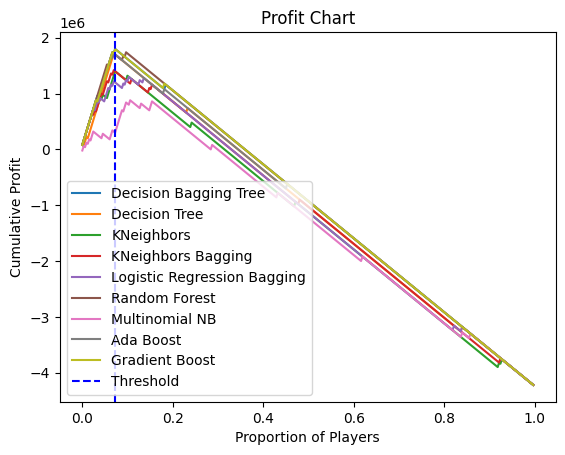

Max Profit: $1800000
Threshold: 0.073


In [ ]:
#This code creates a profit lift chart displaying the profits over the entire sample size for each of the models tested
clf_decision_tree_bagging_model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=1, min_samples_split=4, max_depth=4)
decision_tree_bagging_model = BaggingClassifier(base_estimator=clf_decision_tree_bagging_model, n_estimators=5, random_state=3).fit(X_train, y_train)

decision_tree_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=6, random_state=3, min_samples_leaf=1, min_samples_split=3).fit(X_train, y_train)

kneighbors_model = KNeighborsClassifier(weights = 'uniform', algorithm = 'auto', n_neighbors=8).fit(X_train, y_train)

clf_kneighbors_bagging_model = KNeighborsClassifier(weights = 'uniform', algorithm = 'auto', n_neighbors=7)
kneighbors_bagging_model = BaggingClassifier(base_estimator=clf_kneighbors_bagging_model, n_estimators=15, random_state=3).fit(X_train, y_train)

clf_logistic_bagging_model = LogisticRegression()
logistic_bagging_model = BaggingClassifier(base_estimator=clf_logistic_bagging_model, n_estimators=10, random_state=3).fit(X_train, y_train)

random_forest_model = RandomForestClassifier(criterion = 'entropy', n_estimators=20, min_samples_leaf=3, min_samples_split=2, max_depth=5, random_state=3).fit(X_train, y_train)

np.random.seed(3)
multinomial_nb_model = MultinomialNB(alpha=0.1, fit_prior=True).fit(X_train, y_train)

clf_ada_boost_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, random_state=3, min_samples_leaf=6, min_samples_split=2)
ada_boost_model = AdaBoostClassifier(base_estimator = clf_ada_boost_model, algorithm="SAMME.R", n_estimators=20, learning_rate = 0.1, random_state=3).fit(X_train, y_train)

gradient_boost_model = GradientBoostingClassifier(n_estimators=60, loss = 'deviance', learning_rate=0.1, max_depth=4, min_samples_leaf = 1, min_samples_split=2, random_state=3).fit(X_train, y_train)

prob_df = pd.DataFrame()

prob_df['Actual Class'] = y_train
dtb_prob_df = prob_df.iloc[:]
dt_prob_df = prob_df.iloc[:]
kn_prob_df = prob_df.iloc[:]
knb_prob_df = prob_df.iloc[:]
lgb_prob_df = prob_df.iloc[:]
rf_prob_df = prob_df.iloc[:]
nb_prob_df = prob_df.iloc[:]
ab_prob_df = prob_df.iloc[:]
gb_prob_df = prob_df.iloc[:]

dtb_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(decision_tree_bagging_model, X_train, y_train, cv=10, method='predict_proba')]
dt_prob_df['prob'] = [round(pred[1],4) for pred in  cross_val_predict(decision_tree_model, X_train, y_train, cv=10, method='predict_proba')]
kn_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(kneighbors_model, X_train, y_train, cv=10, method='predict_proba')]
knb_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(kneighbors_bagging_model, X_train, y_train, cv=10, method='predict_proba')]
lgb_prob_df['prob'] = [round(pred[1],4) for pred in  cross_val_predict(logistic_bagging_model, X_train, y_train, cv=10, method='predict_proba')]
rf_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(random_forest_model, X_train, y_train, cv=10, method='predict_proba')]
nb_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(multinomial_nb_model, X_train, y_train, cv=10, method='predict_proba')]
ab_prob_df['prob'] = [round(pred[1],4) for pred in  cross_val_predict(ada_boost_model, X_train, y_train, cv=10, method='predict_proba')]
gb_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(gradient_boost_model, X_train, y_train, cv=10, method='predict_proba')]


dtb_prob_df = dtb_prob_df.sort_values("prob", ascending = False)
dt_prob_df = dt_prob_df.sort_values("prob", ascending = False)
kn_prob_df = kn_prob_df.sort_values("prob", ascending = False)
knb_prob_df = knb_prob_df.sort_values("prob", ascending = False)
lgb_prob_df = lgb_prob_df.sort_values("prob", ascending = False)
rf_prob_df = rf_prob_df.sort_values("prob", ascending = False)
nb_prob_df = nb_prob_df.sort_values("prob", ascending = False)
ab_prob_df = ab_prob_df.sort_values("prob", ascending = False)
gb_prob_df = gb_prob_df.sort_values("prob", ascending = False)


x_vals = [n/331 for n in range(0,331)]


# dtb scatter plot points

dtb_true_count = 0
dtb_y_val = []
for row in dtb_prob_df.iterrows():
    if(row[1][0]):
      dtb_true_count += 80000
    else:
      dtb_true_count -= 20000
    dtb_y_val.append(dtb_true_count)



# dt scatter plot points

dt_true_count = 0
dt_y_val = []
for row in dt_prob_df.iterrows():
    if(row[1][0]):
      dt_true_count += 80000
    else:
      dt_true_count -= 20000
    dt_y_val.append(dt_true_count)



# kn scatter plot points

kn_true_count = 0
kn_y_val = []
for row in kn_prob_df.iterrows():
    if(row[1][0]):
      kn_true_count += 80000
    else:
      kn_true_count -= 20000
    kn_y_val.append(kn_true_count)



# knb scatter plot points

knb_true_count = 0
knb_y_val = []
for row in knb_prob_df.iterrows():
    if(row[1][0]):
      knb_true_count += 80000
    else:
      knb_true_count -= 20000
    knb_y_val.append(knb_true_count)



# lgb scatter plot points

lgb_true_count = 0
lgb_y_val = []
for row in lgb_prob_df.iterrows():
    if(row[1][0]):
      lgb_true_count += 80000
    else:
      lgb_true_count -= 20000
    lgb_y_val.append(lgb_true_count)



# rf scatter plot points

rf_true_count = 0
rf_y_val = []
for row in rf_prob_df.iterrows():
    if(row[1][0]):
      rf_true_count += 80000
    else:
      rf_true_count -= 20000
    rf_y_val.append(rf_true_count)



# nb scatter plot points

nb_true_count = 0
nb_y_val = []
for row in nb_prob_df.iterrows():
    if(row[1][0]):
      nb_true_count += 80000
    else:
      nb_true_count -= 20000
    nb_y_val.append(nb_true_count)



# ab scatter plot points

ab_true_count = 0
ab_y_val = []
for row in ab_prob_df.iterrows():
    if(row[1][0]):
      ab_true_count += 80000
    else:
      ab_true_count -= 20000
    ab_y_val.append(ab_true_count)



# gb scatter plot points

gb_true_count = 0
gb_y_val = []
for row in gb_prob_df.iterrows():
    if(row[1][0]):
      gb_true_count += 80000
    else:
      gb_true_count -= 20000
    gb_y_val.append(gb_true_count)


#lift chart
# Lift chart for the three models
plt.plot(x_vals, dtb_y_val, label="Decision Bagging Tree")
plt.plot(x_vals, dt_y_val, label="Decision Tree")
plt.plot(x_vals, kn_y_val, label="KNeighbors")
plt.plot(x_vals, knb_y_val, label="KNeighbors Bagging")
plt.plot(x_vals, lgb_y_val, label="Logistic Regression Bagging")
plt.plot(x_vals, rf_y_val, label="Random Forest")
plt.plot(x_vals, nb_y_val, label="Multinomial NB")
plt.plot(x_vals, ab_y_val, label="Ada Boost")
plt.plot(x_vals, gb_y_val, label="Gradient Boost")

# threshold
m = max(dtb_y_val)

i = -1

for n, val in enumerate(dtb_y_val):
  if val == m:
    i = n

threshold = round(x_vals[i], 3)

plt.axvline(x=threshold, color='b', linestyle='--', label='Threshold')


plt.title("Profit Chart")
plt.xlabel("Proportion of Players")
plt.ylabel("Cumulative Profit")
plt.legend()
plt.show()

# print max profit and threshold
print(f'Max Profit: ${m}')
print(f'Threshold: {threshold}')

We choose the decision tree bagging model as our model because it has the highest cumulative profit.

**4.3 Using the model selected in 4.2, formulate clearly the investment strategy you will use to decide which players to invest in. The strategy should include the following:**

**a. Which model to use (along with corresponding parameters, such as number and type of models in bagging ensemble, number of K nearest neighbors, etc.)**

Our strategy is to use the Decision Tree Bagging Model, with the predictors 'firstSeason', 'lastSeason', 'league_A', 'Position_G', 'Position_F', 'tpm', 'tpa', 'league_N', and 'Position_C' dropped. We dropped these variables because they probide the least information gain. Additionally, we dropped 'stl', 'blk', and 'turnover', as they were not introduced into the NBA until later, making them skew the data.

**b. Given your model’s estimated probability of induction, above what probability threshold to invest in a player’s memorabilia.**

**(5 points)**

Our optimal threshold is 0.073.


**4.4 Deploy your strategy to the test set**

First, generate predictions for players in the test set and then use these predictions to identify an advantageous probability threshold to use towards your future investments. Use `predict_proba` to get the probability of the predict class.

Hint: use previous homeworks to help with charts if you need it

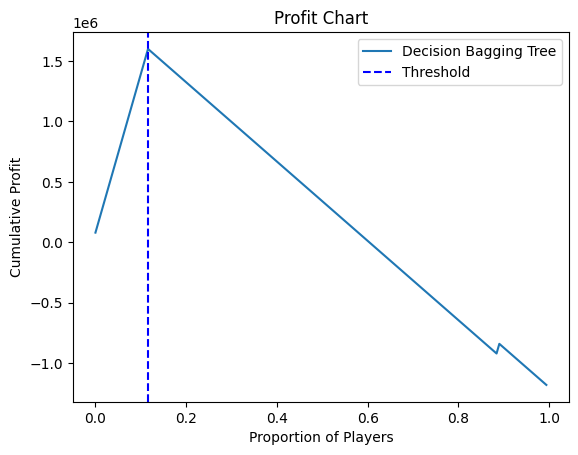

Max Profit: $1600000
Threshold: 0.116


In [ ]:
#This outputs the optimal probability threshold to maximize profits using a lift chart for the decision tree bagging model
clf_decision_tree_bagging_model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=1, min_samples_split=4, max_depth=4)
decision_tree_bagging_model = BaggingClassifier(base_estimator=clf_decision_tree_bagging_model, n_estimators=5, random_state=3).fit(X_test, y_test)

prob_df = pd.DataFrame()

prob_df['Actual Class'] = y_test
dtb_prob_df = prob_df.iloc[:]

dtb_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(decision_tree_bagging_model, X_test, y_test, cv=10, method='predict_proba')]

dtb_prob_df = dtb_prob_df.sort_values("prob", ascending = False)

x_vals = [n/164 for n in range(0,164)]


# dtb scatter plot points

dtb_true_count = 0
dtb_y_val = []
for row in dtb_prob_df.iterrows():
    if(row[1][0]):
      dtb_true_count += 80000
    else:
      dtb_true_count -= 20000
    dtb_y_val.append(dtb_true_count)

#lift chart
# Lift chart for the three models
plt.plot(x_vals, dtb_y_val, label="Decision Bagging Tree")

# threshold
m = max(dtb_y_val)

i = -1

for n, val in enumerate(dtb_y_val):
  if val == m:
    i = n

threshold = round(x_vals[i], 3)

plt.axvline(x=threshold, color='b', linestyle='--', label='Threshold')


plt.title("Profit Chart")
plt.xlabel("Proportion of Players")
plt.ylabel("Cumulative Profit")
plt.legend()
plt.show()

# print max profit and threshold
print(f'Max Profit: ${m}')
print(f'Threshold: {threshold}')

**4.5 Print the list of players (along with their Example number) you will invest in, and report your profit. (10 points)**

In [ ]:
#This code prints the list of players that we would invest in
test_df = pd.DataFrame()

test_df = new_df

X_test = test_df.drop(columns='class')
y_test = test_df['class']

decision_tree_bagging_model = BaggingClassifier(base_estimator=clf_decision_tree_bagging_model, n_estimators=5, random_state=3).fit(X_test, y_test)

test_df['proba'] = [round(pred[1], 4) for pred in decision_tree_bagging_model.predict_proba(X_test)]

target_df = test_df.sort_values('proba', ascending = False)
target_df = test_df.loc[test_df['proba'] >= threshold]
pd.options.display.max_rows = 200
target_df

In [ ]:
#This code outputs the expected optimal profit
profit = 0
for c in target_df['class']:
  if c == True:
    profit += 80000
  else:
    profit -= 20000

print(profit)

3520000


Our expected profit is $3,520,000.

## Attribute Descriptions

Field | Description
------|------------
league| N = National Basketball Association (NBA); A = American Basketball Association (ABA)
games|games played
minutes|minutes played
pts|points
offReb|offensive rebounds
defReb|defensive rebounds
reb|rebounds
asts|assists
stl|steals* (see below)
blk|blocks* (see below)
turnover|turnovers* (see below)
pf|Personal Fouls
fga|field goals attempted
fgm|field goals made
fta|free throws attempted
ftm|free throws made
tpa|three pointers attempted* (see below)
tpm|three pointers made* (see below)
totalSeasons|Total number of seasons played. This value is calculated as follows: "lastSeason - firstSeason + 1"
position|C = Center; F = Forward; G = Guard
firstSeason|First season played. The year corresponds to the first year of the season (i.e. a value of 2000 represents the 2000-2001 season).
lastSeason|Last season played. The year corresponds to the first year of the season (i.e. a value of 2000 represents the 2000-2001 season). Note that 2004 (2004-2005 season) is the last year for which there is data.
careerEnded|Boolean field for if the player's career has ended (1 if career has ended, 0 otherwise). This field was calculated as follows: if the "lastSeason" field is earlier than 2004, the value is 1, otherwise 0. Note that this calculation naively assumes that no players retired at the end of the 2004  season.
yrsRetired2004|The number of seasons that a player has been retired as of the 2004-2005 season.
class|A Boolean field showing whether or not a player was inducted to the Basketball Hall of Fame (HoF) as a player. This field has value 1 if the player has been inducted, and 0 otherwise.




* The NBA did not have three point shots until 1979
* Steals, Blocks and Turnovers were not recorded in the NBA until 1973